# Holiday Analysis

Take special note of the `transferred` column. A holiday officially falls on the designated calendar day but may be moved to another date by the government. A transferred day resembles a regular day more than a holiday. To determine the actual celebration date, refer to the corresponding row where the type is marked as `Transfer`. <br>

For instance, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12, indicating that it was celebrated on 2012-10-12. Days labeled as `Bridge` are additional days added to a holiday to extend the break over a long weekend. These are often compensated by `Work Day`, a day not typically scheduled for work (e.g., Saturday) meant to make up for the Bridge.<br>

Additional holidays are days added to regular calendar holidays, commonly observed around Christmas (such as making Christmas Eve a holiday).

#### To Do:
- Check the relationship with holidays and sales
- Check the relationships with holidays and promotions

In [1]:
# libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
sns.set(rc={"figure.figsize":(12,12)}) 

In [2]:
holiday_df = pd.read_csv("./data/raw/holidays_events.csv")
holiday_df.head(20)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False
6,2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False
7,2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False
8,2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False
9,2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False


In [5]:
holiday_df[holiday_df["transferred"] == True]

,date,type,locale,locale_name,description,transferred
19,2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
72,2013-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
135,2014-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,True
255,2016-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
266,2016-07-25,Holiday,Local,Guayaquil,Fundacion de Guayaquil,True
268,2016-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
303,2017-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,True
312,2017-05-24,Holiday,National,Ecuador,Batalla de Pichincha,True
324,2017-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,True


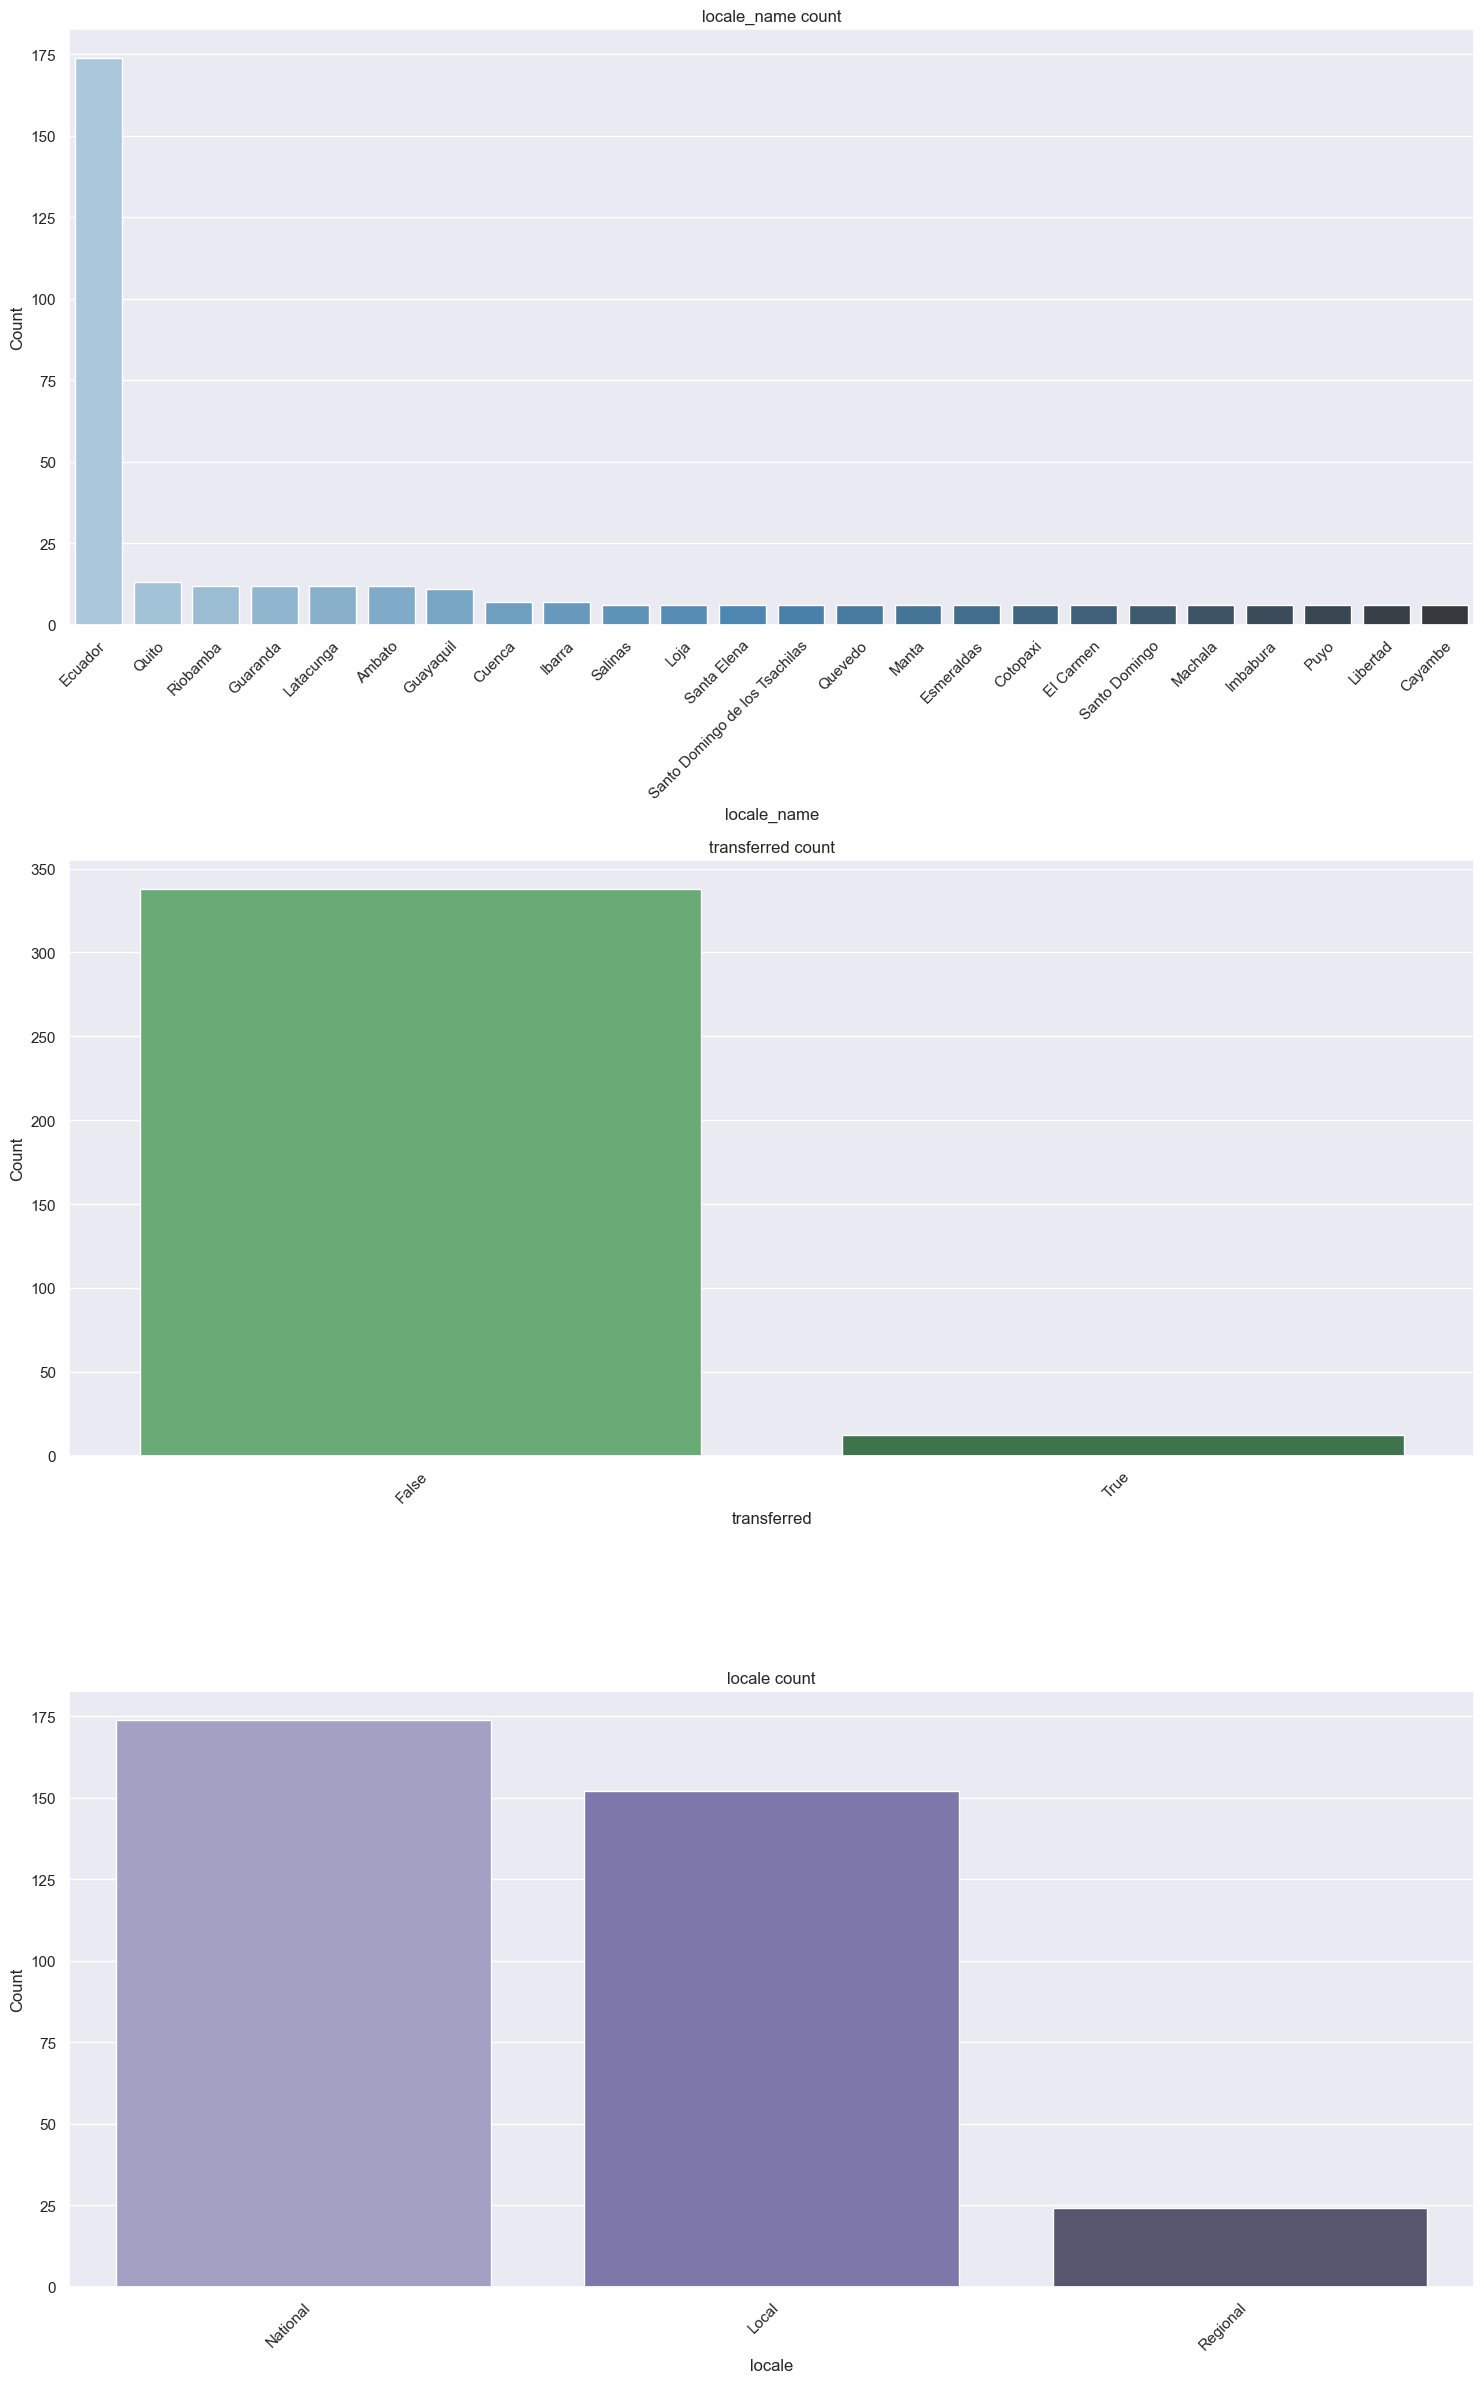

In [6]:
columns = ["locale_name", "transferred", "locale"]
fig, axes = plt.subplots(nrows=3, ncols=1, figsize = (15,3*8))
sets = ["Blues_d","Greens_d", "Purples_d"]

for i, col in enumerate(columns):
    sns.countplot(holiday_df[col], order=holiday_df[col].value_counts(ascending=False).index, palette = sets[i], ax=axes[i])
    axes[i].set_title(f'{col} count')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')
    # axes[i].tick_params(axis='x', rotation=45, rotation_mode='anchor')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

plt.tight_layout()
plt.show()